# Quantum Circuits to Generate the Collapses

To generate the collapses of the overlapping blocks, we will generate three types of circuits that represent the possibilities of the blocks as they have been splited.

The tiles can be separated into up to 4 sub-pieces, in the following combinations:

- 50% , 50%
- 50% , 25% , 25%
- 25% , 25% , 25% , 25%

That order will be maintained in the sub-piece list so that they can always refer to the same probabilities all the time.

That is, the possible lists to indicate the superposed blocks will be:

- 2 blocks:
  - `[ block_50 , None     , None     , block_50 ]`
- 3 blocks:
  - `[ block_50 , block_25 , None     , block_25 ]`
  - `[ block_25 , None     , block_25 , block_50 ]`
- 4 blocks
  - `[ block_25 , block_25 , block_25 , block_25 ]`

The order to consider the result will be:

$$\big[ \, |00\rangle , |01\rangle , |10\rangle , |11\rangle \, \big]$$

Then for example, if the simulation gives us state $|01\rangle$, then the block in position `1` will be the one that prevails so it will be the one that remains after the collapse.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

## Circuit for two blocks: 50% - 50%

00


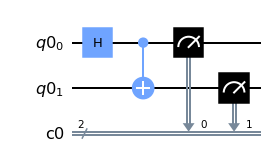

{'00': 491, '11': 509}


In [2]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

# create a Bell state
qc.h(0)
qc.cx(0,1)

qc.measure(q, c)

result_state = list(execute(qc,Aer.get_backend('qasm_simulator'), shots=1).result().get_counts(qc).keys())[0]

# for display purposes of this notebook
print(result_state)
display(qc.draw('mpl'))
job = execute(qc,Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)   
print(counts)
# end for display purposes of this notebook

## Circuit for three blocks: 50% - 25% - 25%

### `[ block_50 , block_25 , None , block_25 ]`

01


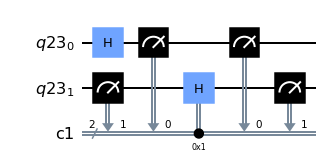

{'00': 495, '11': 254, '01': 251}


In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

# apply first Hadamard
qc.h(0)
qc.measure(q, c)

# apply second Hadamard if the measurement outcome is 0
qc.h(1).c_if(c, 1)
qc.measure(q, c)

result_state = list(execute(qc,Aer.get_backend('qasm_simulator'), shots=1).result().get_counts(qc).keys())[0]

# for display purposes of this notebook
print(result_state)
display(qc.draw('mpl'))
job = execute(qc,Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)   
print(counts)
# end for display purposes of this notebook

### `[ block_25 , None , block_25 , block_50 ]`

11


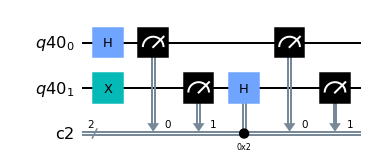

{'00': 243, '10': 235, '11': 522}


In [4]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

# apply first Hadamard
qc.x(1)
qc.h(0)
qc.measure(q, c)

# apply second Hadamard if the measurement outcome is 0
qc.h(1).c_if(c, 2)
qc.measure(q, c)

result_state = list(execute(qc,Aer.get_backend('qasm_simulator'), shots=1).result().get_counts(qc).keys())[0]

# for display purposes of this notebook
print(result_state)
display(qc.draw('mpl'))
job = execute(qc,Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)   
print(counts)
# end for display purposes of this notebook

## Circuit for case: 25% - 25% - 25% - 25%

11


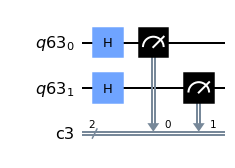

{'10': 237, '00': 243, '01': 250, '11': 270}


In [5]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

# apply Hadamards
qc.h(0)
qc.h(1)
qc.measure(q, c)

result_state = list(execute(qc,Aer.get_backend('qasm_simulator'), shots=1).result().get_counts(qc).keys())[0]

# for display purposes of this notebook
print(result_state)
display(qc.draw('mpl'))
job = execute(qc,Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)   
print(counts)
# end for display purposes of this notebook

In [6]:
arr = ["hol", None, "bye", "otros"]

print(arr.index("hol"))

0
